# 机器学习实验之 支持向量机 

姓名     班级     学号 

## 数据集

数据集采用机器学习里教学用的一个经典数据集， 该数据集高度非线性， 是一个经典的二分类问题。 实验中， 需要你们分别用神经网络和支持向量机去实现分类。 

In [1]:
import tensorflow as tf

print(tf.__version__)

print(tf.test.is_gpu_available())

2.4.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [2]:
import tensorflow as tf 
from scipy.io import loadmat 
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X = (X - mu) / sigma 
    return X

In [4]:
def myplot(X, y, model):
    tx = np.linspace(np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1) 
    ty = np.linspace(np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1) 
    tx, ty = np.meshgrid(tx, ty) 
    shape = np.shape(tx) 
    tx = tx.reshape(-1)
    ty = ty.reshape(-1)
    txy = np.c_[tx, ty] 
    Z = model.predict(txy) 
    ax = Axes3D(plt.figure()) 
    X1 = X[y == 0]
    X2 = X[y == 1]
    ax.scatter(X1[:, 0], X1[:, 1], model.predict(X1), marker='*') 
    ax.scatter(X2[:, 0], X2[:, 1], model.predict(X2), marker='o')
    tx = np.reshape(tx, shape) 
    ty = np.reshape(ty, shape) 
    Z =  np.reshape(Z,  shape) 
    ax.plot_surface(tx, ty, Z, alpha=0.1) 
    ax.contourf(tx, ty, Z, [0.48, 0.52]) 

In [5]:
data = loadmat('ex6data2.mat') 
X = data['X']
X = featureNormalize(X) 
y = np.squeeze(data['y'])

In [6]:
X.shape

(863, 2)

In [7]:
Xpos = X[y==1]
Xpos

array([[-1.55510316e+00, -5.74552323e-01],
       [-1.60935726e+00, -2.79927517e-01],
       [-1.59127269e+00,  6.99331425e-02],
       [-1.36521576e+00,  5.67112502e-01],
       [-1.14820327e+00,  1.08269962e+00],
       [-6.87045346e-01,  1.47860170e+00],
       [-2.89183227e-01,  1.51542980e+00],
       [ 4.61324681e-01,  1.51542980e+00],
       [ 9.94816173e-01,  1.35891037e+00],
       [ 1.23895768e+00,  1.16556284e+00],
       [ 1.20279089e+00,  8.98559111e-01],
       [ 9.67691084e-01,  7.88074809e-01],
       [ 1.05811197e+00,  1.00904341e+00],
       [ 1.04907028e+00,  1.23001202e+00],
       [ 1.03098688e+00,  1.29446119e+00],
       [ 1.08524099e+00,  8.89352086e-01],
       [ 9.67691084e-01,  6.13147628e-01],
       [ 1.01290349e+00,  4.47421175e-01],
       [ 1.22087429e+00,  8.70938036e-01],
       [ 1.22087429e+00,  1.20239094e+00],
       [ 2.35266569e-01,  1.43256657e+00],
       [-3.60000252e-02,  1.29446119e+00],
       [-9.02541289e-02,  1.06428556e+00],
       [-2.

In [8]:
Xneg = X[y == 0]

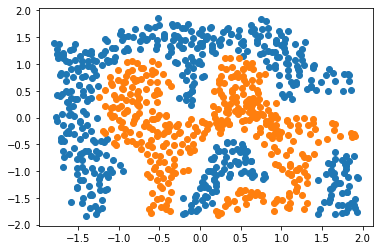

In [9]:
plt.scatter(Xpos[:,0], Xpos[:, 1]) 
plt.scatter(Xneg[:,0], Xneg[:, 1])

### 用神经网络进行分类



In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2, ), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
xx = np.array([1,2,3])

In [12]:
xx.T@xx.T

14

In [13]:
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X, y, epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 4ms/step - loss: 0.6519 - accuracy: 0.6152
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5847 - accuracy: 0.6599
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.7073
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.6988
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.7496
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.7799
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8082
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.7838
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.8070
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.8172
Epoch 11/

27/27 [==============================] - 0s 4ms/step - loss: 0.0753 - accuracy: 0.9657
Epoch 84/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9828
Epoch 85/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.9943
Epoch 86/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9899
Epoch 87/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0577 - accuracy: 0.9853
Epoch 88/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9860
Epoch 89/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9846
Epoch 90/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9840
Epoch 91/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0571 - accuracy: 0.9832
Epoch 92/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9883
Epoch 93/100


In [15]:
def myplot2(X, y, model):
    tx = np.linspace(np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1) 
    ty = np.linspace(np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1) 
    tx, ty = np.meshgrid(tx, ty) 
    shape = np.shape(tx) 
    tx = tx.reshape(-1)
    ty = ty.reshape(-1)
    txy = np.c_[tx, ty] 
    Z = model.predict(txy) 
    X1 = X[y == 0]
    X2 = X[y == 1]
    plt.scatter(X1[:, 0], X1[:, 1], marker='*')
    plt.scatter(X2[:, 0], X2[:, 1], marker='o')
    tx = np.reshape(tx, shape) 
    ty = np.reshape(ty, shape) 
    Z =  np.reshape(Z,  shape) 
    plt.contourf(tx, ty, Z, [0.49, 0.51])

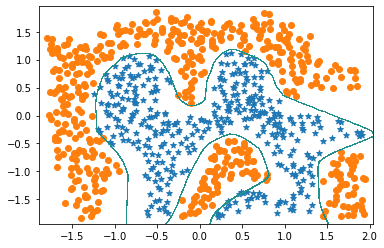

In [16]:
myplot2(X, y, model)

### 支持向量机 from scratch 

你们需要做的参考MATLAB版的SVM， 写出完整的支持向量机。

$$K(x_i, x_j) = exp(-\frac{\|x_i-x_j\|^2}{2\sigma^2})$$

In [17]:
def K(xi, xj, sigma): 
    return np.exp(-(xi-xj)@(xi-xj)/2*sigma*sigma)

### svmTrain 

之所以让你们写这个， 是因为其中的概念和基本语法远比支持向量机本身重要。 

In [18]:
from scipy.io import loadmat
import numpy as np

In [19]:
data = loadmat('ex6data2.mat')
X = data['X']
y = np.squeeze(data['y'])